<a href="https://colab.research.google.com/github/Sreraj/Machine-learning-Projects/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imporrt Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load data
df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [ ]:
# top 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Bottom  5 rows
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
# Columns
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Check null values
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
# impute missing values
# Check unique value of bmi
df['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [ ]:
# fill using its mean

df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [ ]:
# Check null values
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


EDA

In [ ]:
# Collecting categorical columns

categories = df.select_dtypes(include='object').columns
categories

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [ ]:
# Unique values of categoorical columns

for i in categories:
  print(i)
  print(df[i].unique())
  print('-'*100)

gender
['Male' 'Female' 'Other']
----------------------------------------------------------------------------------------------------
ever_married
['Yes' 'No']
----------------------------------------------------------------------------------------------------
work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
----------------------------------------------------------------------------------------------------
Residence_type
['Urban' 'Rural']
----------------------------------------------------------------------------------------------------
smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
----------------------------------------------------------------------------------------------------


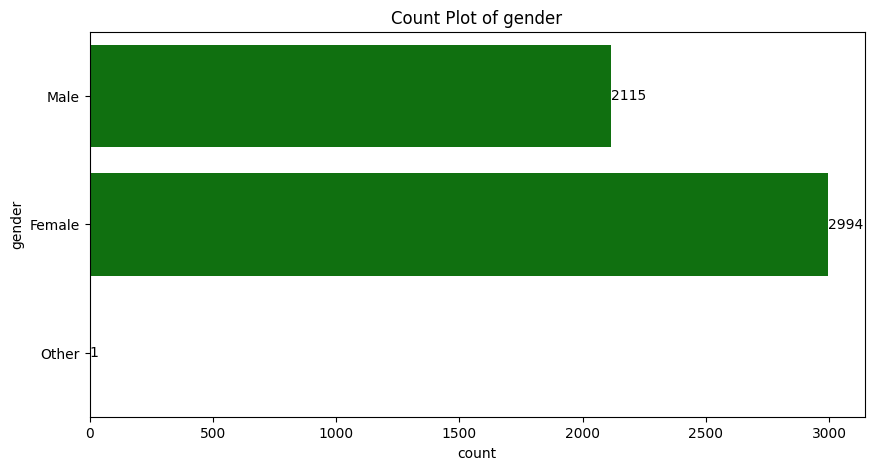

<Figure size 640x480 with 0 Axes>

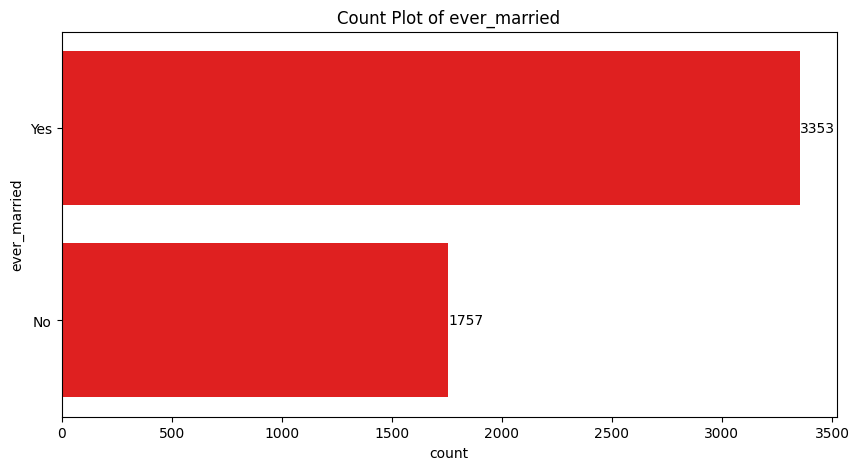

<Figure size 640x480 with 0 Axes>

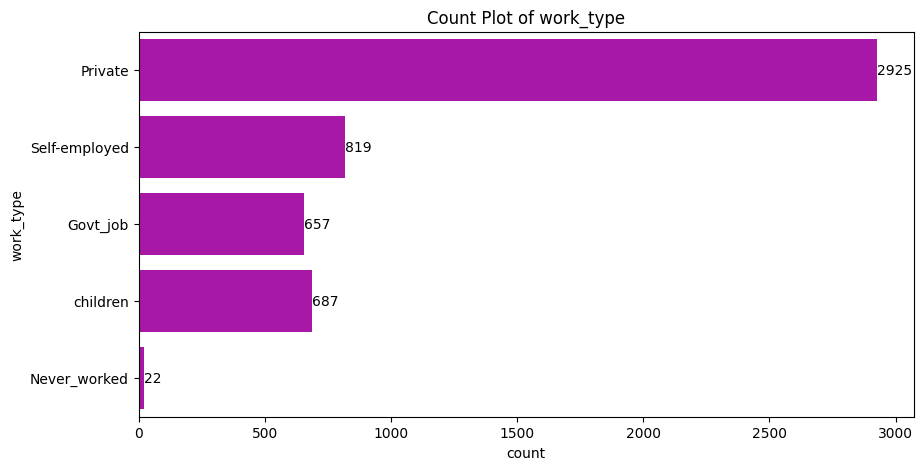

<Figure size 640x480 with 0 Axes>

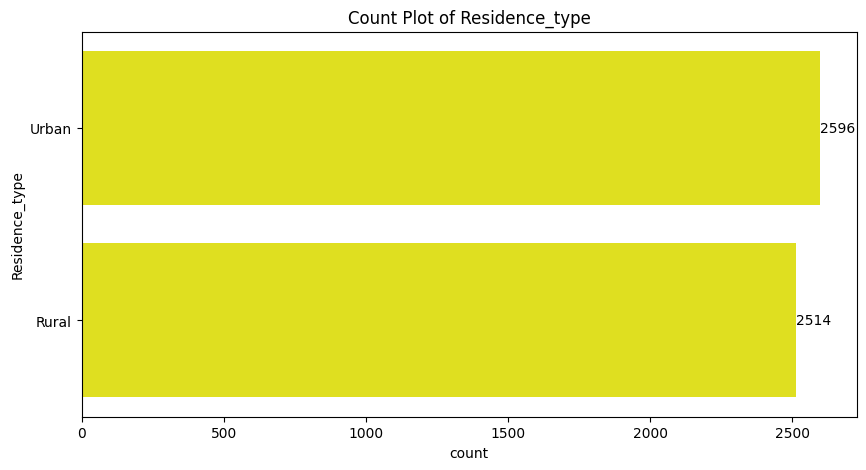

<Figure size 640x480 with 0 Axes>

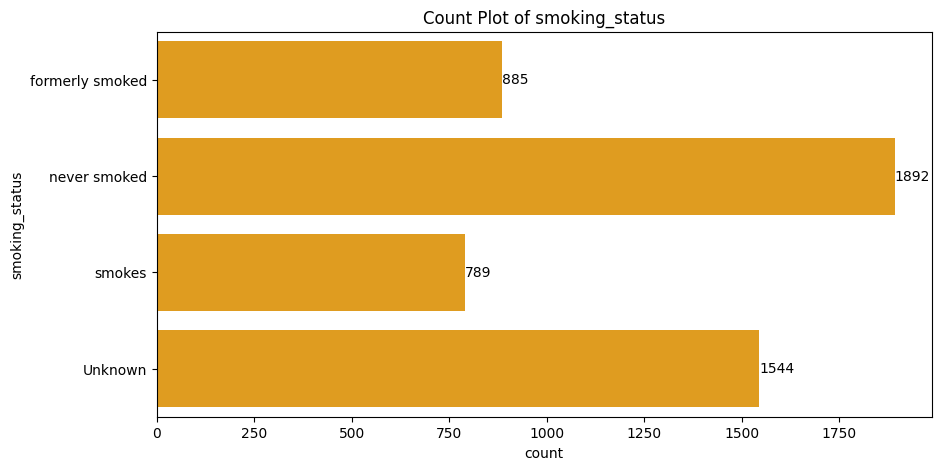

<Figure size 640x480 with 0 Axes>

In [ ]:
# Univariate Analysis
colors = ['green','red','m','yellow','orange']
for i, color in zip(categories,colors):
  plt.figure(figsize=(10,5))
  ax = sns.countplot(df[i],color=color)
  plt.title(f"Count Plot of {i}")
  for j in ax.containers:
    ax.bar_label(j)
  plt.show()
  plt.tight_layout()

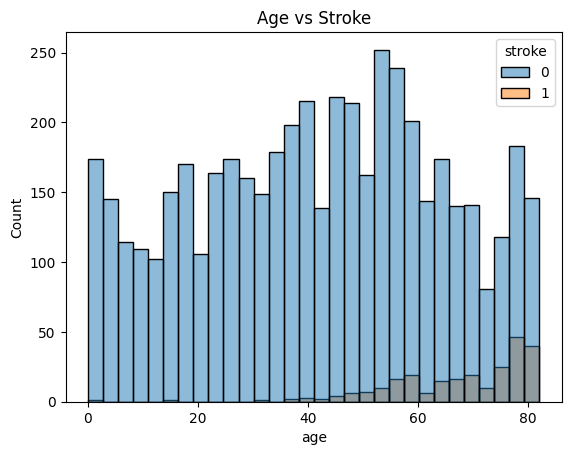

In [ ]:
# Bivariate Analysis

sns.histplot(x='age',data=df,hue=df['stroke'],bins=30)
plt.title ('Age vs Stroke')
plt.show()

* Stroke incidents increase notably from age 40 to 80
* Higher concentration of stroke cases appears 60 to 80 age group
* Very few stroke cases are reported in patients under 40
* The overall distribution shows age is a significant risk factor for strokes

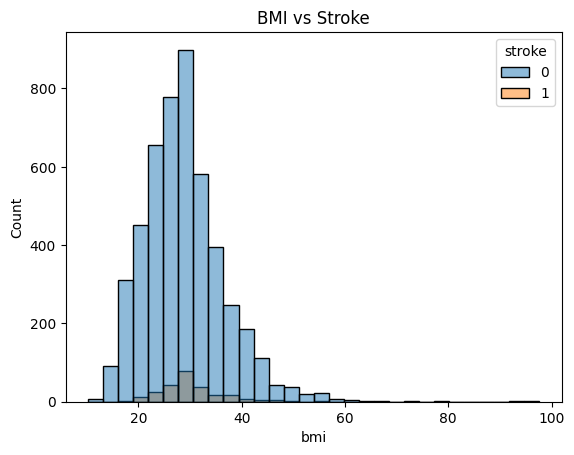

In [ ]:
# Bmi vs stroke

sns.histplot(x='bmi',data=df,hue=df['stroke'],bins=30)
plt.title ('BMI vs Stroke')
plt.show()

* majority of stroke cases are reported between 20 to 40 bmi
* most peak cases are reported between 25 to 35 bmi


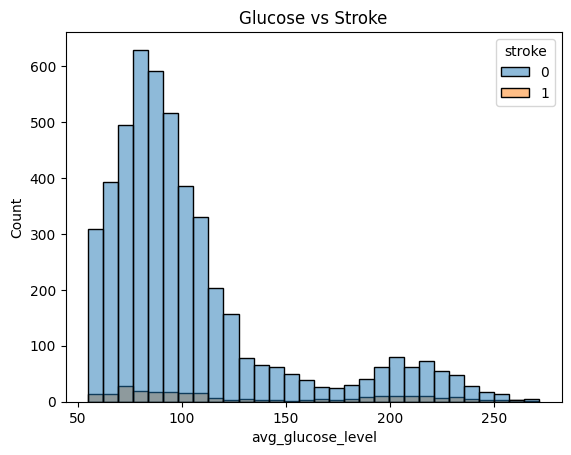

In [ ]:
# Glucose vs Stroke

sns.histplot(x='avg_glucose_level',data=df,hue=df['stroke'],bins=30)
plt.title ('Glucose vs Stroke')
plt.show()

* glucose level 120 to 180 report less cases
* glucose level 50 to 110 and 190 to 240 reported more cases
* peak distribution in 70-90 glucose level
* The data suggests elevated glucose levels may increase stroke risk

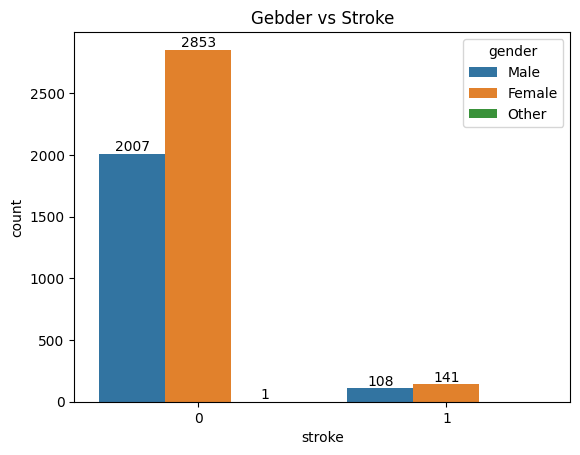

In [ ]:
# Stroke vs Gender

ax = sns.countplot(x=df['stroke'],data=df,hue = df['gender'])
plt.title("Gebder vs Stroke")
for container in ax.containers:
    ax.bar_label(container)
plt.show()


* Females make up the majority of the dataset (55.83% without stroke, 2.76% with stroke) compared to males (39.28% without stroke, 2.11% with stroke), though the proportion of strokes is relatively similar between genders, suggesting gender may not be a strong independent risk factor.

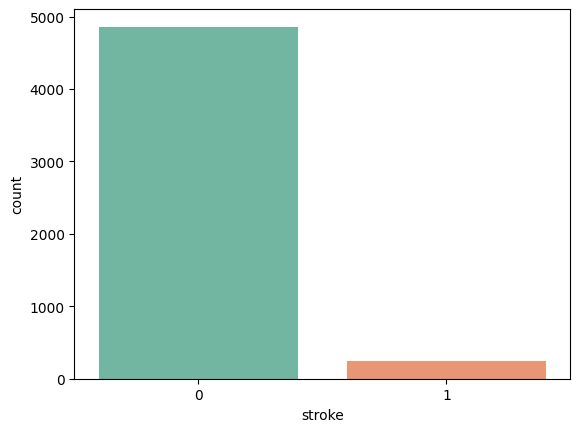

In [ ]:
# Count plot of Stroke

sns.countplot(x='stroke',data =df,palette='Set2')
plt.show()

* This is a imbalanced dataset . we need to balance it

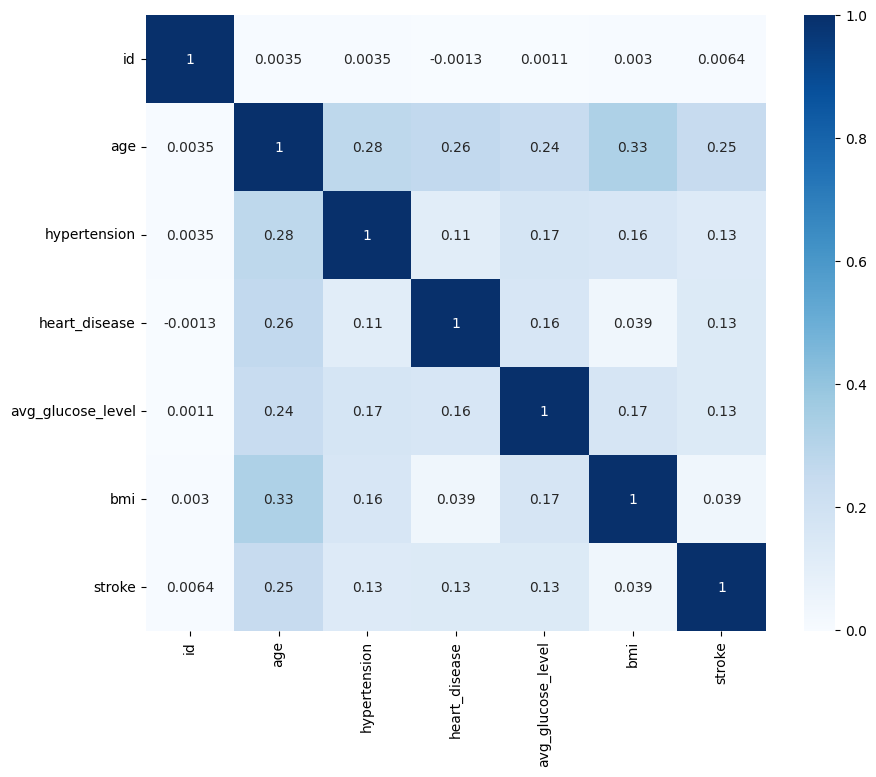

In [ ]:
# Correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues')
plt.show()

In [ ]:
# Drop Irrelavant column

df.drop('id',axis=1,inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
# ENcoding

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

for i in categories:
  df[i]= encode.fit_transform(df[i])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


In [ ]:
# Split input and outputs

x = df.drop('stroke',axis=1)
y = df['stroke']

In [ ]:
# balnced data using SMOTE

from imblearn.over_sampling import SMOTE
smo = SMOTE()

x_smo, y_smo = smo.fit_resample(x,y)

In [ ]:
y_smo.value_counts()

,count
stroke,
1,4861
0,4861


* now the data is balanced


In [ ]:
# Train test Split

from sklearn.model_selection import train_test_split
x_trian,x_test,y_train,y_test = train_test_split(x_smo,y_smo,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_trian = scaler.fit_transform(x_trian)
x_test = scaler.transform(x_test)

In [ ]:
# Model Creation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()

model = [lr,dt,rf,svm,knn,nb]



In [ ]:
for i in model:
  print(f"Model is : {i}")
  i.fit(x_trian,y_train)
  y_pred = i.predict(x_test)
  print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
  print(f"Confusion Matrix : {confusion_matrix(y_test,y_pred)}")
  print(f"Classification Report : {classification_report(y_test,y_pred)}")
  print('-'*100)


Model is : LogisticRegression()
Accuracy : 0.7991086732944807
Confusion Matrix : [[1141  316]
 [ 270 1190]]
Classification Report :               precision    recall  f1-score   support

           0       0.81      0.78      0.80      1457
           1       0.79      0.82      0.80      1460

    accuracy                           0.80      2917
   macro avg       0.80      0.80      0.80      2917
weighted avg       0.80      0.80      0.80      2917

----------------------------------------------------------------------------------------------------
Model is : DecisionTreeClassifier()
Accuracy : 0.9029825162838533
Confusion Matrix : [[1290  167]
 [ 116 1344]]
Classification Report :               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1457
           1       0.89      0.92      0.90      1460

    accuracy                           0.90      2917
   macro avg       0.90      0.90      0.90      2917
weighted avg       0.90      0.9